# Section 01: Basic bioinformatics using scikit-bio

#what is scikit

A scikit library is a ready-made Python package designed for scientific and technical computing. The term scikit stands for scientific toolkit. These libraries are built on top of core Python scientific packages such as NumPy, SciPy, and Matplotlib, and they provide standardized, well-tested tools so researchers and developers do not need to implement complex methods from scratch. Scikit libraries are commonly used to analyze data, apply algorithms, and process images, biological sequences, or signals, enabling faster, more accurate, and more reliable workflows. For example, scikit-learn is widely used for machine learning tasks such as classification, regression, and clustering; scikit-image focuses on image processing techniques including filtering, edge detection, and segmentation; and scikit-bio is designed for bioinformatics applications, supporting the analysis of DNA, RNA, and protein sequences, FASTA/FASTQ files, and phylogenetic data.


**Install scikit-bio**

In [ ]:
!pip install -q scikit-bio

**Import Libraries**

In [ ]:
import skbio
skbio.__version__

'0.7.1.post1'

# upload teh samples


In [ ]:
from google.colab import files

print("📂 Please upload your FASTA file ")
uploaded = files.upload()



📂 Please upload your FASTA file 


Saving tp53.ffn to tp53 (1).ffn


**Why do we use from skbio import DNA?**
Because it tells Python that your sequence is DNA and must follow DNA rules, not just be treated as text.

In [ ]:
from skbio import DNA

**This code first creates an empty list called seqs to store sequences. It then reads the FASTA file for example(tp53.ffn) using skbio.io.read, which processes the file one sequence at a time. By specifying format='fasta', scikit-bio understands the file structure, and by using constructor=DNA, each sequence is automatically converted into a scikit-bio DNA object rather than remaining plain text. As the loop runs, each DNA sequence is appended to the seqs list. At the end of the loop, seqs contains all the sequences from the FASTA file stored as biologically meaningful DNA objects, ready for downstream analysis such as transcription, translation, or alignment.**

In [ ]:
seqs = []
for seq in skbio.io.read('tp53.ffn', format='fasta', constructor=DNA):
    seqs.append(seq)

# Basic sequence types in scikit-bio
1️⃣ **Types of sequences supported**

scikit-bio supports three biological sequence types:

DNA
,RNA
,Protein

Each type follows its own biological rules.

2️⃣ **What a DNA object contains**

The actual nucleotide sequence (A, T, G, C)

Metadata such as:

**sequence ID ** (e.g. human, mouse)

description

Statistics like: sequence length,GC content,presence of gaps or ambiguous bases

In [ ]:
human = seqs[0]
human

DNA
----------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 1182
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 56.85%
----------------------------------------------------------------------
0    ATGGAGGAGC CGCAGTCAGA TCCTAGCGTC GAGCCCCCTC TGAGTCAGGA AACATTTTCA
60   GACCTATGGA AACTACTTCC TGAAAACAAC GTTCTGTCCC CCTTGCCGTC CCAAGCAATG
...
1080 GGGAGCAGGG CTCACTCCAG CCACCTGAAG TCCAAAAAGG GTCAGTCTAC CTCCCGCCAT
1140 AAAAAACTCA TGTTCAAGAC AGAAGGGCCT GACTCAGACT GA

In [ ]:
mouse = seqs[3]
mouse

DNA
----------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'mouse'
Stats:
    length: 1173
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 55.67%
----------------------------------------------------------------------
0    ATGACTGCCA TGGAGGAGTC ACAGTCGGAT ATCAGCCTCG AGCTCCCTCT GAGCCAGGAG
60   ACATTTTCAG GCTTATGGAA ACTACTTCCT CCAGAAGATA TCCTGCCATC ACCTCACTGC
...
1080 GCTCACTCCA GCTACCTGAA GACCAAGAAG GGCCAGTCTA CTTCCCGCCA TAAAAAAACA
1140 ATGGTCAAGA AAGTGGGGCC TGACTCAGAC TGA

🔹 **What is human._bytes[:100]?**

**human** → your TP53 DNA sequence object

**_bytes** → the internal numeric storage of the sequence

**[:100]** → shows only the first 100 characters

So this line is showing how scikit-bio stores DNA internally.

🔹 **Why numbers instead of A, T, G, C? **

scikit-bio does NOT store DNA as text.

Instead, it stores DNA as numbers (ASCII codes) to:

run faster

use less memory

work efficiently on large sequences

🔹 What do these numbers mean?

Each number is the ASCII code of a DNA base:

Base	ASCII number

A	- 65

T	- 84

G	- 71

C	- 67

In [ ]:
human._bytes[:100]

array([65, 84, 71, 71, 65, 71, 71, 65, 71, 67, 67, 71, 67, 65, 71, 84, 67,
       65, 71, 65, 84, 67, 67, 84, 65, 71, 67, 71, 84, 67, 71, 65, 71, 67,
       67, 67, 67, 67, 84, 67, 84, 71, 65, 71, 84, 67, 65, 71, 71, 65, 65,
       65, 67, 65, 84, 84, 84, 84, 67, 65, 71, 65, 67, 67, 84, 65, 84, 71,
       71, 65, 65, 65, 67, 84, 65, 67, 84, 84, 67, 67, 84, 71, 65, 65, 65,
       65, 67, 65, 65, 67, 71, 84, 84, 67, 84, 71, 84, 67, 67, 67],
      dtype=uint8)

🔹 **What does reverse_complement() do?**

It performs two actions on the DNA sequence:

1️⃣ **Complement**

A → T

T → A

G → C

C → G

2️⃣ **Reverse**

Reverses the entire sequence direction

👉 Result = reverse + complementary strand

🔹 **Why do we need reverse complement?**

DNA is double-stranded

Genes can exist on either strand

Many bioinformatics tasks require checking the opposite strand

Used in:

Genome annotation

Primer design

Variant analysis

Regulatory element search

In [ ]:
human.reverse_complement()

DNA
----------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 1182
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 56.85%
----------------------------------------------------------------------
0    TCAGTCTGAG TCAGGCCCTT CTGTCTTGAA CATGAGTTTT TTATGGCGGG AGGTAGACTG
60   ACCCTTTTTG GACTTCAGGT GGCTGGAGTG AGCCCTGCTC CCCCCTGGCT CCTTCCCAGC
...
1080 GGGGGACAGA ACGTTGTTTT CAGGAAGTAG TTTCCATAGG TCTGAAAATG TTTCCTGACT
1140 CAGAGGGGGC TCGACGCTAG GATCTGACTG CGGCTCCTCC AT

**🔹 What does transcription mean?**

Transcription = DNA → RNA

It is the first step of gene expression

Happens in the nucleus (biologically)

**🔹 What changes during transcription?**

Only ONE change happens:

DNA base	RNA base
T (Thymine)	U (Uracil)

In [ ]:
human.transcribe()

RNA
----------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 1182
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 56.85%
----------------------------------------------------------------------
0    AUGGAGGAGC CGCAGUCAGA UCCUAGCGUC GAGCCCCCUC UGAGUCAGGA AACAUUUUCA
60   GACCUAUGGA AACUACUUCC UGAAAACAAC GUUCUGUCCC CCUUGCCGUC CCAAGCAAUG
...
1080 GGGAGCAGGG CUCACUCCAG CCACCUGAAG UCCAAAAAGG GUCAGUCUAC CUCCCGCCAU
1140 AAAAAACUCA UGUUCAAGAC AGAAGGGCCU GACUCAGACU GA

DNA → RNA → Protein

This step follows the central dogma of biology

**🔹 What does translation mean?**

Translation = RNA → Protein

Ribosomes read RNA 3 bases at a time (codons)

Each codon produces one amino acid

In [ ]:
human.translate()

Protein
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 394
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   MEEPQSDPSV EPPLSQETFS DLWKLLPENN VLSPLPSQAM DDLMLSPDDI EQWFTEDPGP
60  DEAPRMPEAA PPVAPAPAAP TPAAPAPAPS WPLSSSVPSQ KTYQGSYGFR LGFLHSGTAK
...
300 PGSTKRALPN NTSSSPQPKK KPLDGEYFTL QIRGRERFEM FRELNEALEL KDAQAGKEPG
360 GSRAHSSHLK SKKGQSTSRH KKLMFKTEGP DSD*

#**Pairwise Alignment**

scikit-bio provides methods for sequence alignment. We will start by showing the functionality of local pairwise alignment using the pair_align_nucl. It outputs the score and path of an optimal alignment.




**What is pairwise alignment?**

>It compares two sequences

>Tries to line them up to:

>maximize matches

>allow gaps where needed

>Used to measure similarity







**pair_align_nucl is used to align DNA sequences**

It understands:

A, T, G, C

insertions

deletions

In [ ]:
from skbio.alignment import pair_align_nucl

**scikit-bio:**

compares human DNA with mouse DNA
finds the best local alignment


**Output (res) contains:**

alignment score,
alignment path

In [ ]:
res=pair_align_nucl(human, mouse)

**What this means:**(res.score)
Numeric similarity score
Higher score → more similarity

Includes:

matches (+)

mismatches (−)

gaps (penalty)

In [ ]:
res.score


1181.0

**What is path?**

Describes how sequences were aligned

Stores:

matches

insertions

deletions

Does not store actual letters

**output **
**CIGAR string → THIS IS THE KEY**


**🧩 What does each letter mean?**


M>	Letters are aligned (match or mismatch)

I>	Insertion (extra base in one sequence)

D>  Deletion (missing base in one sequence)

In [ ]:
path = res.paths[0]
path

<PairAlignPath, positions: 1192, segments: 20, CIGAR: '9I96M3D8M1D5M1D3M1D...'>

The alignment is a tabular multiple sequence alignment (TabularMSA) object. It is a data structure meant for intuitive manipulation and visualization of pairwise or multiple sequence alignments.

**What is TabularMSA in simple words?**

TabularMSA = alignment shown like a table

Each row = one sequence

Each column = one aligned position

Gaps are shown using -

It makes alignments easy to see and understand.

In [ ]:
from skbio.alignment import TabularMSA



res.paths[0] → tells how the sequences should be aligned

(human, mouse) → the two DNA sequences

TabularMSA.from_path_seqs(...) →
👉 builds a visible alignment table

In [ ]:
msa = TabularMSA.from_path_seqs(res.paths[0], (human, mouse))
msa

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 1192
-----------------------------------------------------------------------
---------ATGGAGGAGCCGCAGTCAGATCCT ... ATGTTCAAGACAGAAGGGCCTGACTCAGACTGA
ATGACTGCCATGGAGGAGTCACAGTCGGATATC ... ATGGTCAAGAAAGTGGGGCCTGACTCAGACTGA

**Alignment path**

scikit-bio further provides AlignPath (and its derivative PairAlignPath), a more memory and compute efficient data structure. It stores the alignment path but not the sequences.

The underlying data structure of an alignment path is two arrays: lengths and states. The lengths array represents the segment length for each segment with consistent gap status. The sum of the lengths array is equal to the number of the positions in the alignment, in our case 1192
.

In [ ]:
path.lengths

array([  9,  96,   3,   8,   1,   5,   1,   3,   1,  27,   3,  13,   3,
        13,   6,  43,   1,  10,   1, 945])

In [ ]:
path.lengths.sum()

np.int64(1192)

**path.states What do the numbers mean?**

For pairwise alignment, scikit-bio uses:

**Number	Meaning	Plain English**

0	Match / Mismatch	Letters are aligned

1	Insertion	Extra base in one sequence

2	Deletion	Missing base in one sequence


| Length | State | Meaning          |
| ------ | ----- | ---------------- |
| 9      | 1     | 9 insertions     |
| 96     | 0     | 96 aligned bases |
| 3      | 2     | 3 deletions      |
| 8      | 0     | 8 aligned bases  |
| 1      | 2     | 1 deletion       |
| 5      | 0     | 5 aligned bases  |
| …      | …     | …                |


In [ ]:
path.states

array([[1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0]],
      dtype=uint8)

In [ ]:
path.to_cigar()

'9I96M3D8M1D5M1D3M1D27M3D13M3D13M6D43M1I10M1D945M'

#**Substitution matrix**
For protein sequence alignment, a substitution matrix is usually used to define the scores of changes between amino acids. scikit-bio's SubstitutionMatrix class provides this functionality.

In [ ]:
from skbio import SubstitutionMatrix

**🧠 What is BLOSUM62? (VERY SIMPLE)**

👉 BLOSUM62 is a scoring table for protein alignment.

It tells the computer:

“If this amino acid changes into that amino acid, how acceptable is it?”

**🧩 Why do we need BLOSUM62?**

Proteins are made of 20 amino acids.
During evolution:

Some amino acid changes are safe

Some changes break the protein

So we must score changes differently, not all equally.

**🧪 Simple real-life analogy**

Think of a sentence:

“I like coffee”

Changing words:

coffee → tea ☕ ✅ (similar meaning)

coffee → car 🚗 ❌ (wrong meaning)

**👉 BLOSUM62 is a table that gives:**

high score for coffee → tea

low score for coffee → car

In [ ]:
sm = SubstitutionMatrix.by_name('BLOSUM62')

1️⃣ **skbio**

The scikit-bio library

Used for biological data

2️⃣**alignment**

A module inside scikit-bio

Contains tools for:

DNA alignment

Protein alignment

Multiple alignment

3️⃣ **pair_align_prot**

A function

Used to:

Align two protein sequences

Compare amino acids

Allow gaps

Calculate similarity score

In [ ]:
from skbio.alignment import pair_align_prot

1️⃣ **human.translate()**

human = DNA sequence of TP53 (human)

.translate() = converts DNA → Protein

Uses the genetic code:

Reads DNA 3 bases at a time (codons)

Each codon → one amino acid

So this gives:

Human TP53 protein sequence

2️⃣ **mouse.translate()**

Same thing, but for mouse DNA

Converts mouse TP53 DNA → mouse TP53 protein

So this gives:

Mouse TP53 protein sequence

In [ ]:
prots = human.translate(), mouse.translate()

**1> pair_align_prot(...)**

This function:

compares two protein sequences

allows gaps (-)

uses biological rules

finds the best alignment

**2> sub_score=sm**

sm = BLOSUM62 matrix

This tells the function:

“Score amino-acid substitutions using BLOSUM62”

Without this:

all mismatches would be treated the same ❌
With this:

biologically reasonable changes get better scores

In [ ]:
score, paths, _ = pair_align_prot(*prots, sub_score=sm)
score

1550.0


**1️⃣ paths[0]**

Contains instructions

Tells:

where amino acids align

where gaps (-) are inserted

Does not contain letters

Think of it as:

“Blueprint of the alignment”

**2️⃣ prots**
prots = (human_protein, mouse_protein)


The actual protein sequences

These are the letters (M, A, G, …)

3️⃣ TabularMSA.from_path_seqs(...) **bold text**

This function:

Takes the alignment blueprint

Applies it to the real protein sequences

Builds a table-like alignment

In [ ]:
msa = TabularMSA.from_path_seqs(paths[0], prots)
msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 397
-----------------------------------------------------------------------
---MEEPQSDPSVEPPLSQETFSDLWKLLPENN ... SRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD*
MTAMEESQSDISLELPLSQETFSGLWKLLPPED ... SRAHSSYLKTKKGQSTSRHKKTMVKKVGPDSD*

#**Multiple Alignment**

It is also possible to use scikit-bio to perform multiple sequence alignment. The following code demonstrates the procedures of progressive alignment -- a classical strategy for aligning multiple sequences.

Here, we will first translate the sequences into protein, and align the protein sequences from the seven organisms. We also create a dictionary of the sequences where each key is the name of the organism, and each value is the Protein sequence of that organism. This step is necessary for the progressive alignment function we've written. As you see below, translation of all the sequences is possible in a single line of code using list comprehension.

seqs
→ list of DNA sequences (human, mouse, rat, chicken, pig, chimp, monkey)

seq.translate()
→ DNA → Protein

[ ... for seq in seqs ]
→ do this for every sequence

In [ ]:
prots = [seq.translate() for seq in seqs]

In [ ]:
names = ('human', 'chimp', 'monkey', 'mouse', 'rat', 'pig', 'chicken')

In [ ]:
prot_dict = {name: sequence for name, sequence in zip(names, prots)}

In [ ]:
prot_dict['pig']

Protein
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'pig'
Stats:
    length: 387
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   MEESQSELGV EPPLSQETFS DLWKLLPENN LLSSELSLAA VNDLLLSPVT NWLDENPDDA
60  SRVPAPPAAT APAPAAPAPA TSWPLSSFVP SQKTYPGSYD FRLGFLHSGT AKSVTCTYSP
...
300 LPTSTSSSPV QKKKPLDGEY FTLQIRGRER FEMFRELNDA LELKDAQTAR ESGENRAHSS
360 HLKSKKGQSP SRHKKPMFKR EGPDSD*

#**Distance matrix**

Now with all of our sequences translated we can build a distance matrix among them. scikit-bio's DistanceMatrix class provides a convenient interface for working with distance matrices. Among its various functionality, we will use the from_iterable method to automatically create a distance matrix for all pairs of items in a Python iterable, in this case the list of sequences.

In [ ]:
from skbio import DistanceMatrix

We will define a function that calculates the distance between a pair of items. Here, we will perform pairwise sequence alignment, then calculate the Hamming distance between the aligned sequences.

Hamming distance = fraction of positions that are different

0.0 → identical

1.0 → completely different

In [ ]:
from skbio.sequence.distance import hamming

**1️⃣ Align the two proteins**

res = pair_align_prot(seq1, seq2, sub_score=sm)


Uses BLOSUM62

Finds best alignment

**2️⃣ Build an alignment table**

msa = TabularMSA.from_path_seqs(res.paths[0], (seq1, seq2))


Makes sure sequences are same length

Inserts gaps where needed

**3️⃣ Measure difference**

return hamming(*msa)


Counts mismatched positions

Returns a distance value

👉 Final output = one number between 0 and 1

In [ ]:
def align_dist(seq1, seq2):
    if seq1 is seq2:
        return 0.0   # distance to itself MUST be zero

    res = pair_align_prot(seq1, seq2, sub_score=sm)
    msa = TabularMSA.from_path_seqs(res.paths[0], (seq1, seq2))
    return hamming(*msa)


**What this does (important):**

Takes all protein sequences

Compares every pair

Stores results in a matrix

So it computes:

| human ↔ mouse |

| human ↔ rat   |

| human ↔ chicken|

| ...|

| chimp ↔ monkey|


In [ ]:
dm = DistanceMatrix.from_iterable(prots, align_dist, key='id', validate=False)
dm

In [ ]:
dm.data


array([[0.        , 0.99604743, 0.04314721, 0.23173804, 0.22921914,
        0.17424242, 0.47103275],
       [0.99604743, 0.        , 0.99604743, 1.        , 0.99803536,
        0.98770492, 1.        ],
       [0.04314721, 0.99604743, 0.        , 0.23929471, 0.22921914,
        0.18939394, 0.46599496],
       [0.23173804, 1.        , 0.23929471, 0.        , 0.12878788,
        0.25063291, 0.50980392],
       [0.22921914, 0.99803536, 0.22921914, 0.12878788, 0.        ,
        0.23155216, 0.49875931],
       [0.17424242, 0.98770492, 0.18939394, 0.25063291, 0.23155216,
        0.        , 0.47727273],
       [0.47103275, 1.        , 0.46599496, 0.50980392, 0.49875931,
        0.47727273, 0.        ]])

In [ ]:
dm['human', 'monkey']


np.float64(0.04314720812182741)

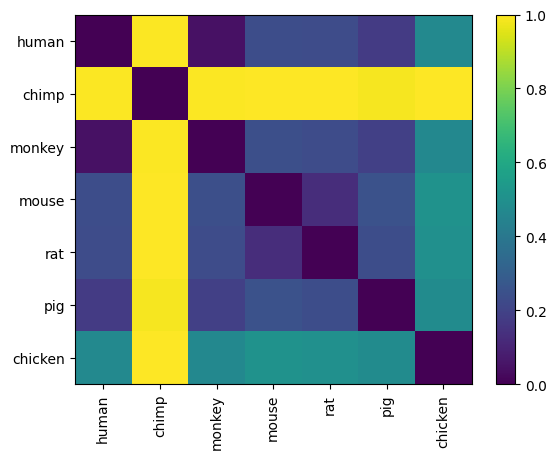

In [ ]:
dm.plot();

#**Guide tree**

Once we've created our distance matrix, we can generate a tree based on this matrix using any distance-based methods. This tree will serve as the guide tree for the progressive alignment algorithm.

We will use SciPy's average function, which implements the UPGMA method (a hierarchical clustering method that is also widely used in phylogenetics). The return value is a linkage matrix.

**UPGMA = Unweighted Pair Group Method with Arithmetic Mean**

Don’t worry about the name — here’s what it does:

1️⃣ Find the closest two species

2️⃣ Join them into a group

3️⃣ Treat that group as one unit

4️⃣ Repeat until all species are connected

👉 It builds the tree step by step from closest to farthest


Imports a clustering method from SciPy

(average) = UPGMA algorithm

It works on distance data

In [ ]:
from scipy.cluster.hierarchy import average


**dm.condensed_form()**

Converts the distance matrix into a compact list

This is the format clustering algorithms expect

In [ ]:
guide_lm = average(dm.condensed_form())

scikit-bio's TreeNode class is a versatible interface for working with tree structures, with various enhancements for phylogenetic trees. It can convert a linkage matrix into a tree.

**TreeNode is scikit-bio’s object for:**

phylogenetic trees

evolutionary trees

hierarchical trees

**It understands:**

parents

children

branches

rooting

In [ ]:
from skbio import TreeNode

1️⃣ Takes the linkage matrix (instructions)

2️⃣ Takes species names (dm.ids)

3️⃣ Builds an actual tree structure

**Now the computer understands:**

which species are grouped

their relationships

In [ ]:
guide_tree = TreeNode.from_linkage_matrix(guide_lm, dm.ids)

In [ ]:
print(guide_tree.ascii_art())

          /-chimp
         |
---------|          /-chicken
         |         |
          \--------|                    /-mouse
                   |          /--------|
                   |         |          \-rat
                    \--------|
                             |          /-pig
                              \--------|
                                       |          /-human
                                        \--------|
                                                  \-monkey


#**Progressive alignment**

Here we define our progressive alignment function. In this algorithm, proximal sequences and groups of sequences are sequentially merged via pairwise alignment, following the order defined by the guide tree. The slower but more versatible global_pairwise_align_protein function will be used.

Progressive alignment lets us align many sequences accurately by following evolutionary relationships.

Now let’s unpack that slowly.

1️⃣ The real problem we are solving

You have 7 TP53 protein sequences:

human

chimp

monkey

mouse

rat

pig

chicken

❓ Question:
How do we align all 7 sequences at the same time so that:

biologically related residues line up

gaps are inserted sensibly

conserved regions are preserved

❌ You cannot just align all 7 at once randomly
❌ Order matters
❌ Wrong order = bad alignment

2️⃣ Why pairwise alignment is NOT enough

Pairwise alignment only compares two sequences:

human ↔ mouse   ✅
human ↔ rat     ✅


But it cannot tell you:

how human, mouse, rat, pig all relate together

which ones should be aligned first

So we need a strategy.

3️⃣ Progressive alignment = smart strategy
Core idea:

Align the most similar sequences first, then gradually add more distant ones.

This mimics evolution.

**We import a function that:**

Aligns two protein sequences

Aligns them from start to end (global alignment)

Allows gaps (-)

Uses biological scoring

In [ ]:
from skbio.alignment import global_pairwise_align_protein

**sm is the BLOSUM62 matrix**

global_pairwise_align_protein expects:

a dictionary form of the matrix

So this line just reformats BLOSUM62.

In [ ]:
sm_dict = sm.to_dict()

In [ ]:
def progressive_msa(query_seqs, guide_tree):
    c1, c2 = guide_tree.children

    if c1.is_tip():
        c1_aln = query_seqs[c1.name]
    else:
        c1_aln = progressive_msa(query_seqs, c1)

    if c2.is_tip():
        c2_aln = query_seqs[c2.name]
    else:
        c2_aln = progressive_msa(query_seqs, c2)

    return global_pairwise_align_protein(
        c1_aln, c2_aln, substitution_matrix=sm_dict)[0]

Here we perform progressive alignment. By default, the alignment programs in scikit-bio will return TabularMSA objects. As mentioned previously, these are intuitive data structures and have several built-in methods which are useful.

In [ ]:
msa = progressive_msa(prot_dict, guide_tree)

In [ ]:
msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 7
    position count: 519
-----------------------------------------------------------------------
MMPSRTNLATGIPSSKVKYSRLSSTDDGYIDLQ ... ---------------------------------
--------------------------------- ... PRPSKGRRVKVEGPQPSCGKKLLQKGSD*----
...
--------------------------------- ... RAHSSHLKSK-KGQSTSRHKKLMFKTEGPDSD*
--------------------------------- ... RAHSSHLKSK-KGQSTSRHKKFMFKTEGPDSD*

#**Alignment exploration**

We can next get some information about this alignment. For example, we can easily see that there are 7 sequences in this alignment, and that it's 276 characters long. By definition, there is no variance in sequence length in a multiple sequence alignment. For this reason, it's common to think of an alignment as a matrix or table, where rows represent sequences and columns represent positions in the sequences.

Alignment exploration is the process of analyzing an aligned set of sequences to find conserved, variable, and functionally important positions.

In [ ]:
msa.shape

Shape(sequence=7, position=519)

In [ ]:
msa.index

RangeIndex(start=0, stop=7, step=1)

Here we can see what the consensus sequence among the alignment is by calling the consensus method.

In [ ]:
msa.consensus()

Protein
---------------------------------------------------------------------
Stats:
    length: 519
    has gaps: True
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   ---------- ---------- ---------- ---------- ---------- ----------
60  ---------- ---------- ---------- ---------- ---------- -------MEE
...
420 LPPGSAKRAL PTNTSSSPQP KKKPL--DGE YFTLQIRGRE RFEMFRELNE ALELKDAQAA
480 EESGDSRAHS SHLKSK-KGQ STSRHKKLMF KKEGPDSD*

👉 It measures how conserved each position is across all sequences in your alignment.

In simple words:

It tells you which amino-acid positions are important and which are flexible.

Conservation = how much a position stays the same across species

Highly conserved → very important → evolution protects it

Low conservation → less important → can change freely

In [ ]:
conserv = msa.conservation(gap_mode='include')

A conservation value of ~0.87 means:

👉 These positions are highly conserved, but not perfectly conserved.

Most species have the same amino acid

One or two species might have a different (but similar) amino acid

Evolution strongly prefers keeping this region unchanged

In [ ]:
conserv[100:110]

array([0.86920202, 0.86920202, 0.86920202, 0.86920202, 0.86920202,
       0.86920202, 0.86920202, 0.86920202, 0.86920202, 0.86920202])

High conservation ≠ perfect conservation

In [ ]:
(conserv > 0.8).sum()

np.int64(304)

**1️⃣ res = []**

Creates an empty list

This list will store:

position number

amino acid at that position

**2️⃣ for i, value in enumerate(conserv):**

conserv = array of conservation scores (one score per alignment position)

enumerate gives:

i → position index (0, 1, 2, …)

value → conservation score at that position

📌 Example:

Position 10 → conservation = 1.0
Position 11 → conservation = 0.86

**3️⃣ if value == 1.0:**

Checks:

“Is this position perfectly conserved?”

1.0 means:

Same amino acid in all sequences

No variation at all

**4️⃣ res.append((i, str(msa[0][i])))**

If the position is perfectly conserved:

i → alignment position

msa[0][i] → amino acid at that position
(taken from the first sequence, since all are identical here)

str() converts it to a readable letter (A, L, G, etc.)

In [ ]:
res = []
for i, value in enumerate(conserv):
    if value > 0.8:
        res.append((i, str(msa[0][i])))

In [ ]:
print(res)

[(0, 'M'), (1, 'M'), (2, 'P'), (3, 'S'), (4, 'R'), (5, 'T'), (6, 'N'), (7, 'L'), (8, 'A'), (9, 'T'), (10, 'G'), (11, 'I'), (12, 'P'), (13, 'S'), (14, 'S'), (15, 'K'), (16, 'V'), (17, 'K'), (18, 'Y'), (19, 'S'), (20, 'R'), (21, 'L'), (22, 'S'), (23, 'S'), (24, 'T'), (25, 'D'), (26, 'D'), (27, 'G'), (28, 'Y'), (29, 'I'), (30, 'D'), (31, 'L'), (32, 'Q'), (33, 'F'), (34, 'K'), (35, 'K'), (36, 'T'), (37, 'P'), (38, 'P'), (39, 'K'), (40, 'I'), (41, 'P'), (42, 'Y'), (43, 'K'), (44, 'A'), (45, 'I'), (46, 'A'), (47, 'L'), (48, 'A'), (49, 'T'), (50, 'V'), (51, 'L'), (52, 'F'), (53, 'L'), (54, 'I'), (55, 'G'), (56, 'A'), (57, 'F'), (58, 'L'), (59, 'I'), (60, 'I'), (61, 'I'), (62, 'G'), (63, 'S'), (64, 'L'), (65, 'L'), (66, 'L'), (67, 'S'), (68, 'G'), (69, 'Y'), (70, 'I'), (71, 'S'), (72, 'K'), (73, 'G'), (74, 'G'), (75, 'A'), (76, 'D'), (77, 'R'), (78, 'A'), (79, 'V'), (80, 'P'), (81, 'V'), (82, 'L'), (83, 'I'), (84, 'I'), (85, 'G'), (86, 'I'), (87, 'L'), (88, 'V'), (89, 'F'), (90, 'L'), (91, 'P'

Finally we can visualize the conservation along the full length of the alignment to get an idea of where the more and less conserved positions are found. In general, positions that are highly conserved are thought to have specific structural or functional roles in the protein, while positions that are less conserved might have less specific roles (e.g., providing a filler between two functional domains in the linear protein backbone).

In [ ]:
import matplotlib.pyplot as plt

🟦 High flat regions (near 0.85–0.9)

Amino acids are very similar across species

Usually indicate:

Functional domains

DNA-binding regions

Structural cores

👉 In TP53, this corresponds to important functional regions

🔻 Deep dips (0.45–0.6)

High variability across species

Likely:

Flexible regions

Disordered regions

Species-specific insertions/deletions

👉 TP53 has many intrinsically disordered regions, so this is expected

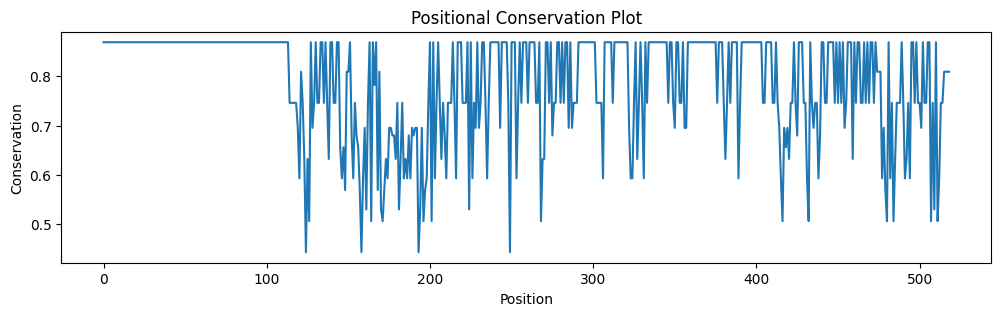

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(range(len(conserv)), conserv)
plt.xlabel('Position')
plt.ylabel('Conservation')
plt.title('Positional Conservation Plot');

#**Phylogenetics**

With a multiple sequence alignment, one can reconstruct a phylogenetic tree to model the evolutionary relationships among the organisms. A variety of computational methods exist for this task. Here, we will demonstrate one of the simplest yet scalable methods.

First, let's also build a distance matrix based on the Hamming distances among alignment sequences. The difference of this distance matrix from the previous one is that it is based on the multiple sequence alignment , rather than separate pairwise alignments. Therefore it is presumably more accurate.

Phylogenetics = building a family tree of species using sequences

You are asking:

“Based on the TP53 protein sequences, which species are evolutionarily closer, and which are farther apart?”

🔁 Why phylogenetics comes LAST

You must do things in this order:

DNA / Protein sequences

Alignment (put same positions together)

Distance calculation (how different are they?)

Tree construction (phylogenetics) ✅

👉 A tree without alignment is biologically meaningless

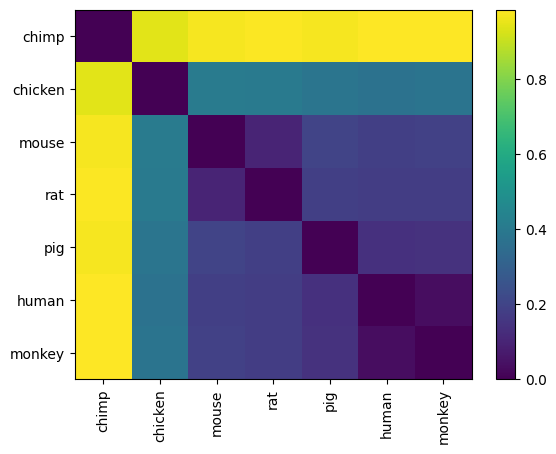

In [ ]:
dm_msa = DistanceMatrix.from_iterable(msa, hamming, key='id', validate=False)
dm_msa.plot();

Then we will call neighbor joining, a classical distance-based phylogenetic reconstruction method. It is implemented in scikit-bio's nj function.

In [ ]:
from skbio.tree import nj

In [ ]:
tree = nj(dm)

Unlike UPGMA, the output of neighbor-joining is an unrooted tree. We will perform mid-point rooting on it.

In [ ]:
tree = tree.root_at_midpoint()

Explore the tree. One can assess whether / to what extent the tree topology aligns with our knowledge of vertebrate evolution, and make relevant interpretations.

In [ ]:
print(tree.ascii_art())

          /-chimp
         |
---------|          /-chicken
         |         |
         |         |                              /-human
          \--------|                    /--------|
                   |          /--------|          \-monkey
                   |         |         |
                    \--------|          \-pig
                             |
                             |          /-mouse
                              \--------|
                                        \-rat
